In [35]:
#import libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#import data file
data = pd.read_csv("cleaned_data.csv")

#drop error index
# data.drop("Unnamed: 0", axis=1, inplace=True)
# data.drop("Unnamed: 0.1", axis=1, inplace=True)

In [36]:
#drop Total functional expenses as it encompases all cost
sns.barplot(data=data, y='description', x='value')

In [18]:
sorted(data['description'].unique())

['Accounting fees',
 'Advertising',
 'All other expenses',
 'Benefits paid to or for members',
 'Compensation and other distributions not included above to disqualified persons',
 'Compensation of current officers, directors, and key employees',
 'Conferences, conventions and meetings',
 'Depreciation, depletion, and amortization',
 'Grants and other assistance to governments, organizations and individuals in the U.S',
 'Grants and other assistance to governments, organizations and individuals outside the U.S.',
 'Information technology',
 'Insurance',
 'Interest',
 'Investment management fees',
 'Legal fees',
 'Lobbying fees',
 'Management fees',
 'Occupancy',
 'Office expenses',
 'Other employee benefits',
 'Other fees',
 'Other salaries and wages',
 'Payments of travel or entertainment expenses for any Federal, state or local public officials',
 'Payments to affiliates',
 'Payroll taxes',
 'Pension plan contributions',
 'Professional fundraising fees',
 'Royalties',
 'Total function

In [49]:
#precentage of canceled based on special request
# data2 = data.groupby(['description'])['value'].sum()
# values_total
# data2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).round(1)
# data2

data_test = data['object_id'][3]
data_plot = data[data['object_id']==data_test]
# sns.barplot(data=data_plot, y='description', x='value')
total_val = data_plot['value'].where(data_plot['description']=="Total functional expenses").sum()
val = ((data_plot['value']/total_val)*100).round(2)
data_plot.insert(4,'perc_cost',val)
data_plot.head()

,object_id,line_number,description,value,perc_cost,name
2,201233199349305998,Part IX Line 5; col (A),"Compensation of current officers, directors, a...",497157,5.96,DOVELEWIS EMERGENCY ANIMAL HOSPITAL
3,201233199349305998,Part IX Line 7; col (A),Other salaries and wages,4093138,49.10,DOVELEWIS EMERGENCY ANIMAL HOSPITAL
4,201233199349305998,Part IX Line 9; col (A),Other employee benefits,656174,7.87,DOVELEWIS EMERGENCY ANIMAL HOSPITAL
5,201233199349305998,Part IX Line 10; col (A),Payroll taxes,415246,4.98,DOVELEWIS EMERGENCY ANIMAL HOSPITAL
6,201233199349305998,Part IX Line 11b; col (A),Legal fees,6314,0.08,DOVELEWIS EMERGENCY ANIMAL HOSPITAL


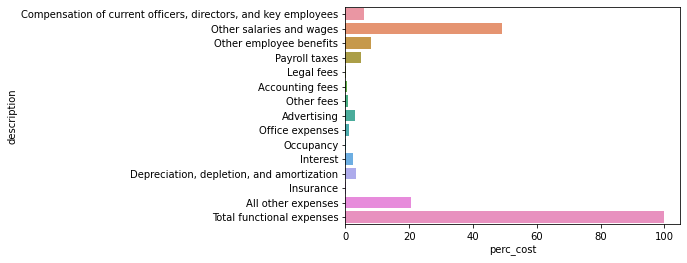

In [50]:
sns.barplot(data=data_plot, y="description", x="perc_cost")

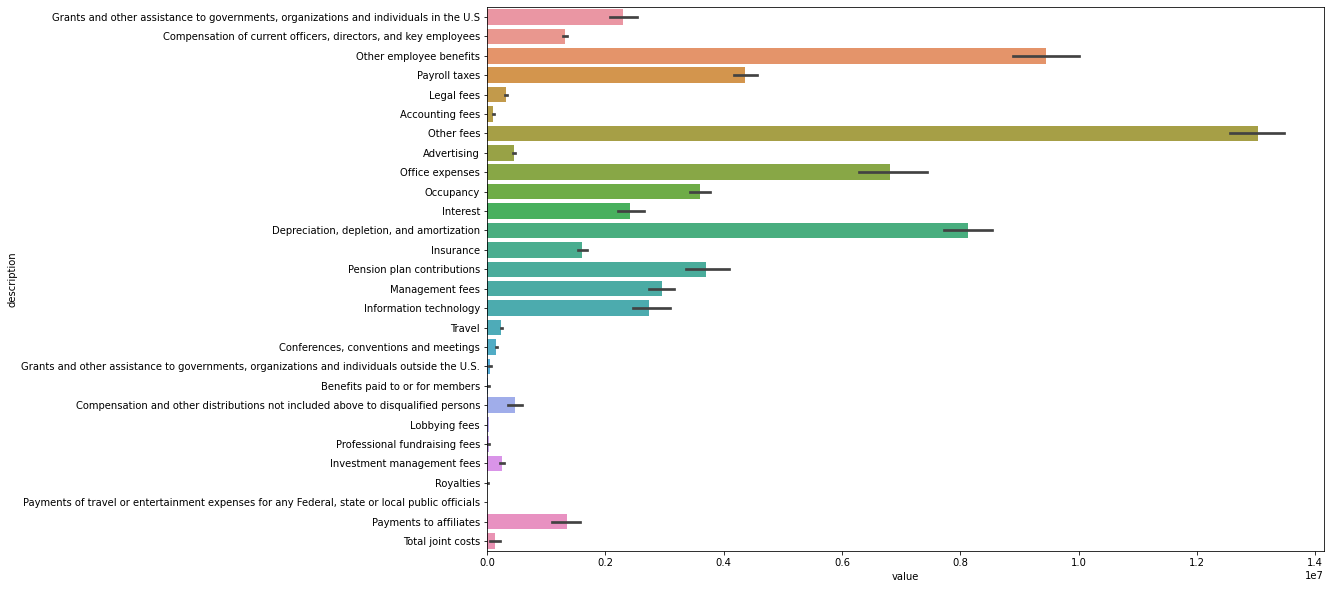

In [57]:
df = data.drop(data[data['description']=='Total functional expenses'].index)
df = df.drop(df[df['description']=='Other salaries and wages'].index)
df = df.drop(df[df['description']=='All other expenses'].index)

plt.figure(figsize=(15,10))
sns.barplot(data=df, y='description', x='value')


In [58]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

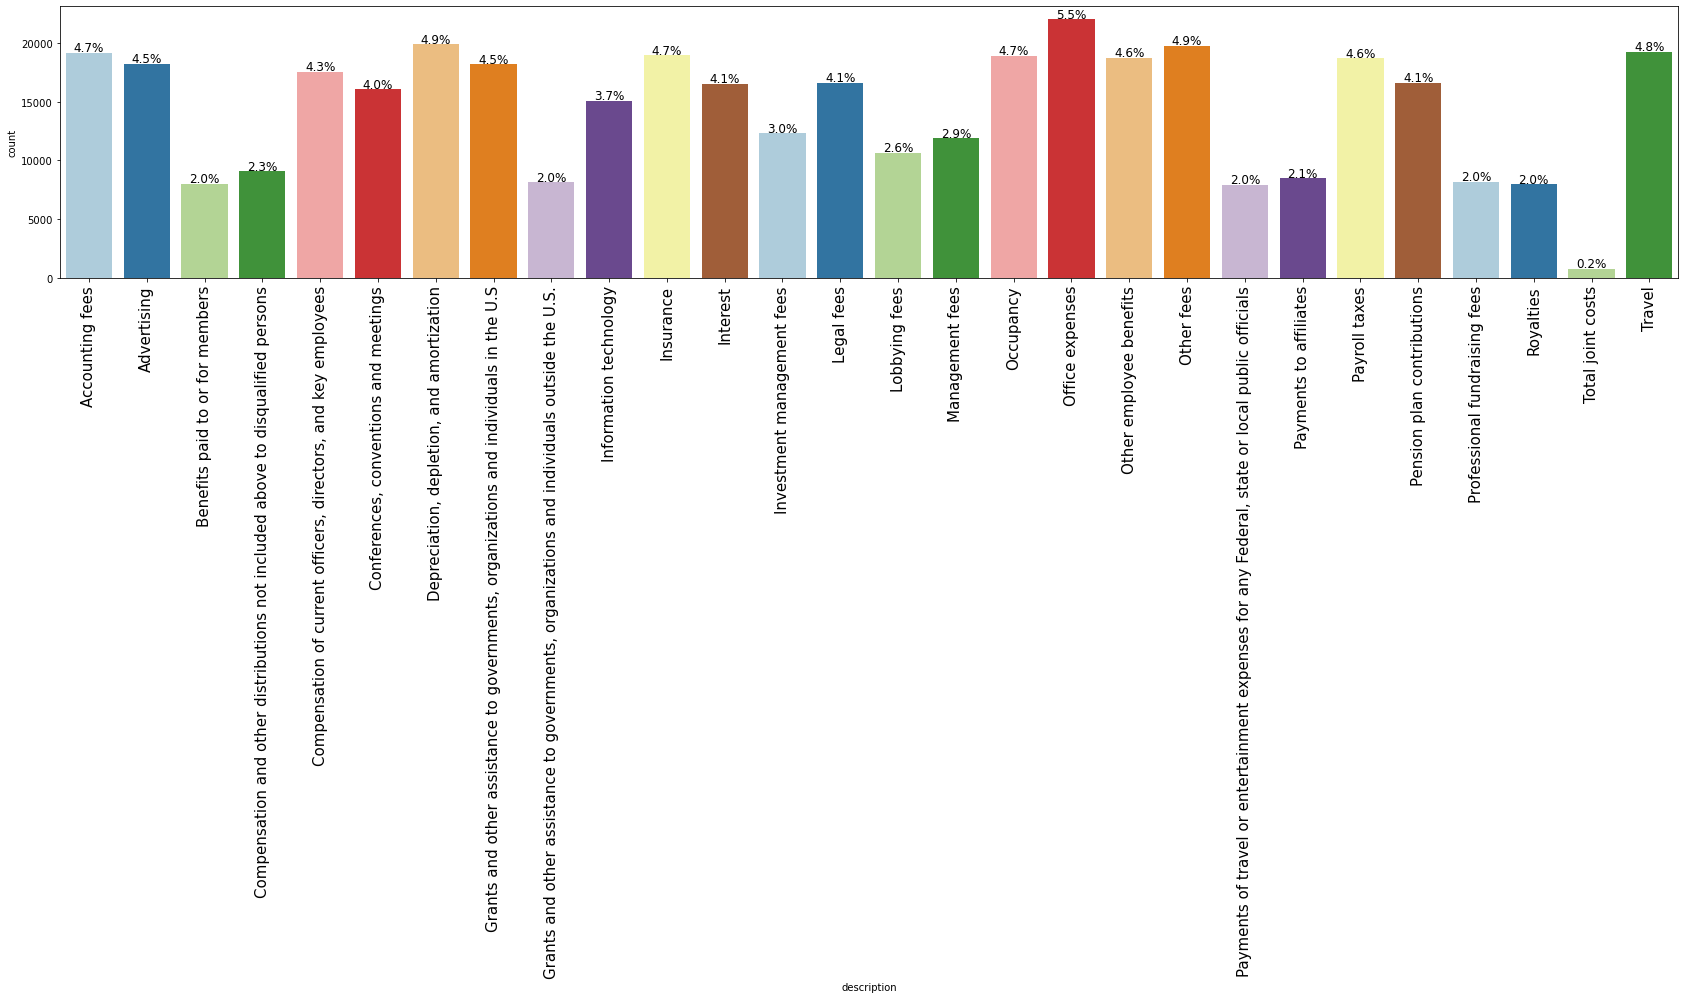

In [59]:
labeled_barplot(df, "description", perc=True)